In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, adjusted_mutual_info_score, silhouette_score, homogeneity_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_selection =    1    # 0 for wine, 1 for cancer

In [3]:
wine = pd.read_csv('data/wine.csv',sep=';')
bins = (2, 6.5, 8)
group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'], bins=bins,labels=group_names)
wine = wine.dropna()
wine_label_quality = LabelEncoder()
wine['quality'] = wine_label_quality.fit_transform(wine['quality'])

cancer = pd.read_csv('data/cancer.csv')
cancer = cancer.dropna()
cancer['class']=cancer['class'].map({4:1, 2:0})

if data_selection == 0:
    X = wine.drop('quality',axis=1)
    y = wine['quality']
    y_save = y
    dataset = 'Wine Dataset'
elif data_selection == 1:
    X = cancer.drop(['id','class'],axis=1)
    y = cancer['class'] 
    y_save = y
    dataset = 'Cancer Dataset'
else:
    print("0 for wine, 1 for cancer")

In [4]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# K-Means

In [5]:
N = np.arange(2, 41, 1)

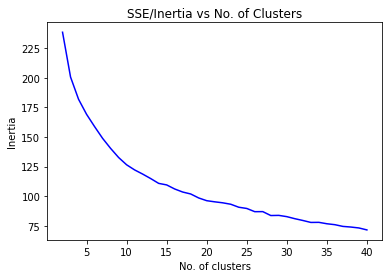

In [12]:
inertia =[]
for n in N:
    kmeans = KMeans(n_clusters=n,
                    max_iter=1000,
                    random_state=44).fit(X)
    
    inertia.append(kmeans.inertia_)
    
plt.figure()
plt.plot(N, inertia,'b')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.title('SSE/Inertia vs No. of Clusters')
plt.savefig('img/KMeans SSE vs clusters - '+dataset+'.png')
plt.show()

1. higher homogeneity is desired
2. silhouette of 1 is good -1 is bad 0 indicates overlapping clusters

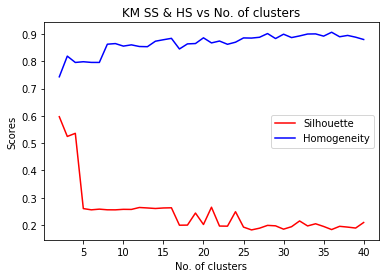

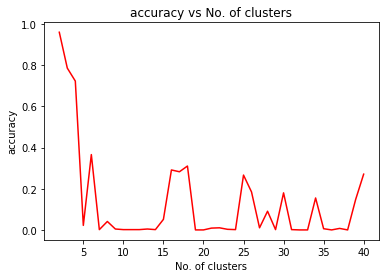

In [32]:
S,H = [],[]
acc_array=[]
for n in N:
    km = KMeans(n_clusters=n,
                n_init=50,
                max_iter=1000,
                random_state=44,).fit(X)
    l = km.predict(X)
    S.append(silhouette_score(X, km.labels_, metric='euclidean'))
    H.append(homogeneity_score(y, km.labels_))
    acc_array.append(accuracy_score((1-l), y))

    
plt.figure()
plt.plot(N, S, 'r', label="Silhouette")
plt.plot(N, H, 'b', label="Homogeneity")
plt.legend()
plt.ylabel("Scores")
plt.xlabel('No. of clusters')
plt.title('KM SS & HS vs No. of clusters')
plt.savefig('img/KMeans SS&HS vs clusters - '+dataset+'.png')
plt.show()

plt.figure()
plt.plot(N, acc_array, 'r')
plt.xlabel('No. of clusters')
plt.ylabel('accuracy')
plt.title('accuracy vs No. of clusters')
plt.show()

# Expectation Maximization

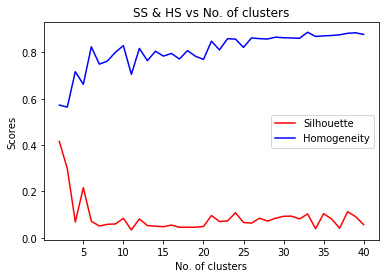

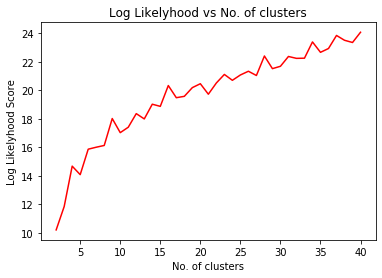

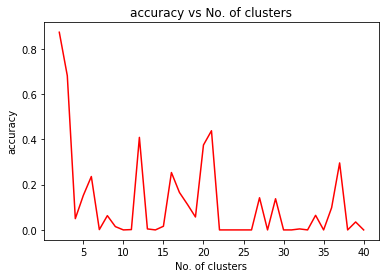

In [31]:
S, H, L = [],[],[]
acc_array =[]
for n in N:
    gmm = GaussianMixture(n_components=n,
                          random_state=44, 
                          n_init=15).fit(X)
    l = gmm.predict(X)
    S.append(silhouette_score(X, l, metric='euclidean'))
    H.append(homogeneity_score(y, l))
    L.append(gmm.score(X))
    acc_array.append(accuracy_score((1-l), y))
    
plt.figure()
plt.plot(N, S, 'r', label="Silhouette")
plt.plot(N, H, 'b', label="Homogeneity")
plt.legend()
plt.title('EM SS & HS vs No. of clusters')
plt.xlabel('No. of clusters')
plt.ylabel('Scores')
plt.savefig('img/EM SS&HS vs clusters - '+dataset+'.png')
plt.show()

plt.figure()
plt.plot(N, L, 'r')
plt.xlabel('No. of clusters')
plt.ylabel('Log Likelyhood Score')
plt.title('Log Likelyhood vs No. of clusters')
plt.savefig('img/EM Log vs clusters - '+dataset+'.png')
plt.show()

plt.figure()
plt.plot(N, acc_array, 'r')
plt.xlabel('No. of clusters')
plt.ylabel('accuracy')
plt.title('accuracy vs No. of clusters')
plt.show()